In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [4]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")

In [5]:
from sklearn.preprocessing import LabelEncoder

# df = df[~((df['tempo'] == 0) & (~df['genre'].isin([16])))]

# # # Filtro per rimuovere le righe con acousticness e energy > 0.8 e non appartenenti ai genre_group 1 e 2
# df = df[~((df['acousticness'] > 0.8) & (df['energy'] > 0.8) & (~df['genre'].isin([16])))]
# df = df[~((df['acousticness'] < 0.3) & (df['energy'] < 0.3) & (~df['genre'].isin([16,12,18])))]

# Il DataFrame 'df' ora contiene solo le righe che soddisfano le tue condizioni

# Calcola i quantili per 'popularity'
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.60)
Q4 = df['popularity'].quantile(0.80)

# Definisci gli intervalli di bin
bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']


# Crea la colonna 'popularity_category' con i valori discretizzati
df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)
df=df.drop(["popularity"], axis=1)

le = LabelEncoder()
df['popularity_category'] = le.fit_transform(df['popularity_category'])

df.head()

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,popularity_category
0,Love Came Down,293106,False,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,afrobeat,3
1,PIMP,194972,False,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,afrobeat,3
2,Soul Saxes Meeting,178428,False,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,afrobeat,2
3,Reino Animal,238373,False,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,afrobeat,1
4,La luna de espejos,221893,False,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,afrobeat,2


In [6]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)
df['genre'] = pd.factorize(df['genre'])[0]
y = np.array(df["genre"])
df = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
X = df.values


In [7]:
df.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_category
0,293106,0,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,3
1,194972,0,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,3
2,178428,0,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,2
3,238373,0,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,1
4,221893,0,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,2


In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# K-means

In [9]:
sse_list = []
for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

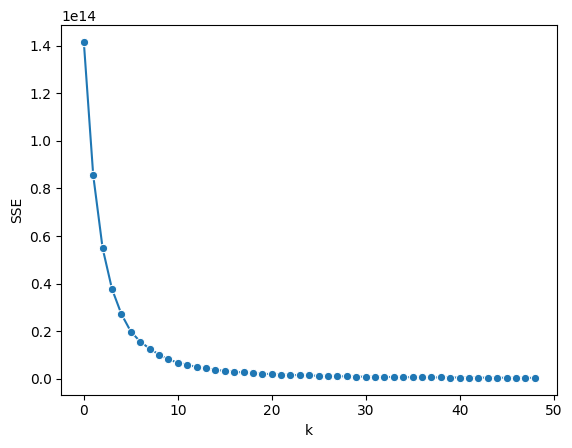

In [10]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

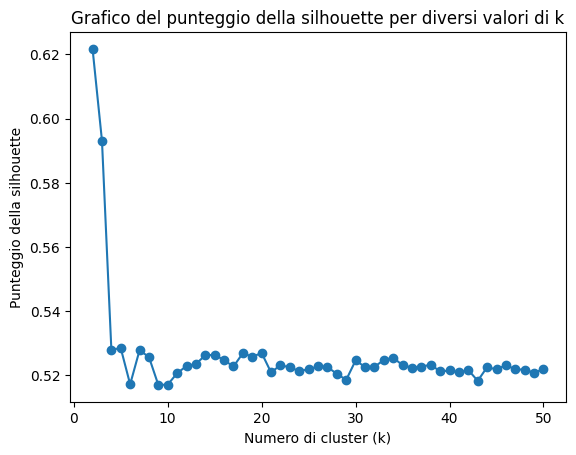

In [11]:
silhouette_scores = []

# Calcola il punteggio della silhouette per diversi valori di k
for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=4)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Crea un grafico per visualizzare il punteggio della silhouette in funzione di k
plt.plot(range(2, 51), silhouette_scores, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Punteggio della silhouette')
plt.title('Grafico del punteggio della silhouette per diversi valori di k')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=4)

In [13]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 9166.639532371937
Silhouette 0.1950753544046582


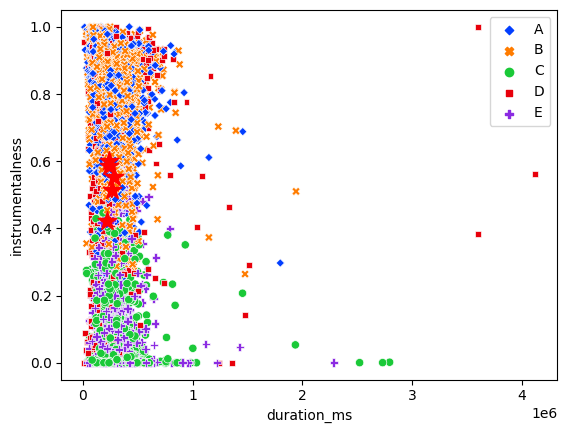

In [14]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3:"D", 4: "E"})

sns.scatterplot(data=df, 
                x="duration_ms", 
                y="instrumentalness", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C", "D", "E"]
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

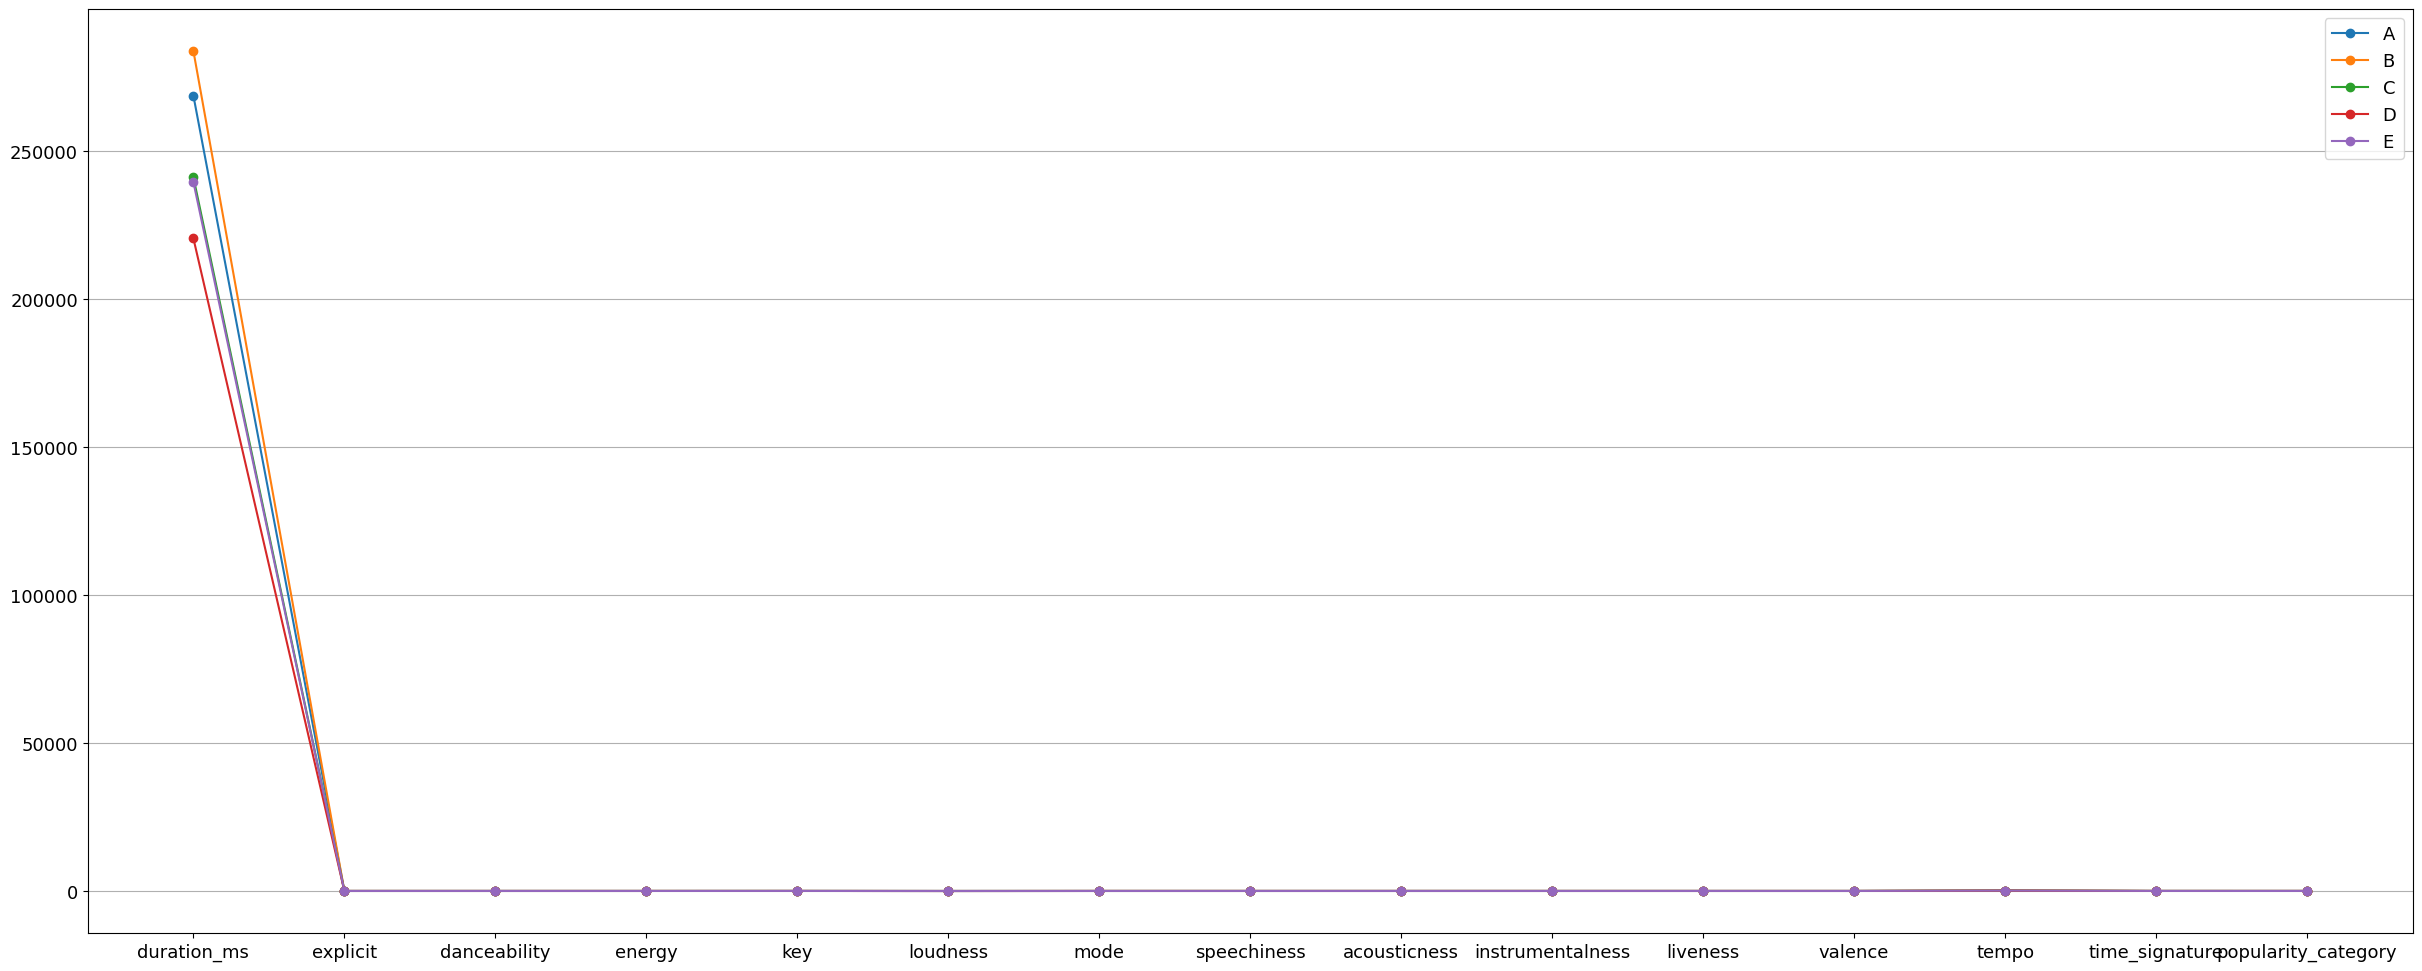

In [15]:
plt.figure(figsize=(30, 12))

clust_name = ['A', 'B', 'C', 'D', "E"]
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(df.columns) - 1), df.columns[:-1], fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13, loc='best')
plt.grid(axis='y')

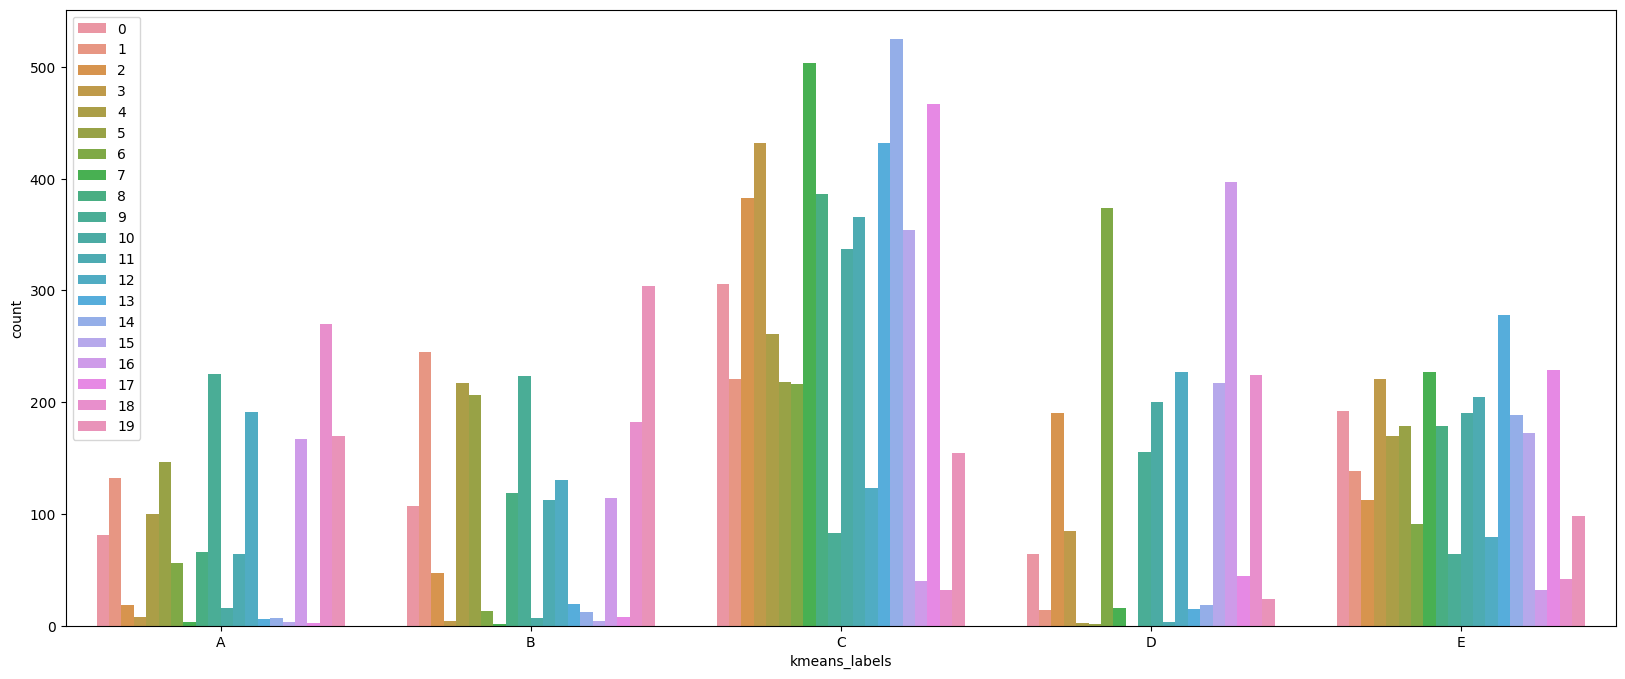

In [16]:
plt.figure(figsize=(20, 8))

sns.countplot(data=df, x='kmeans_labels', hue=y, order=["A", "B", "C", "D", "E"])
plt.show()

In [17]:
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame per i cluster
df['cluster'] = cluster_labels

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Determinare il cluster dominante per ogni genere
dominant_cluster_per_genre = cluster_genre_counts.idxmax(axis=0)

print(dominant_cluster_per_genre)

genre
0     2
1     1
2     2
3     2
4     2
5     2
6     3
7     2
8     2
9     0
10    2
11    2
12    3
13    2
14    2
15    2
16    3
17    2
18    0
19    1
dtype: int64


# Bisecting k-means

In [18]:
from sklearn.cluster import BisectingKMeans

In [19]:
bkmeans = BisectingKMeans(n_clusters=5, n_init=10, max_iter=100)
bkmeans.fit(X_minmax)

BisectingKMeans(max_iter=100, n_clusters=5, n_init=10)

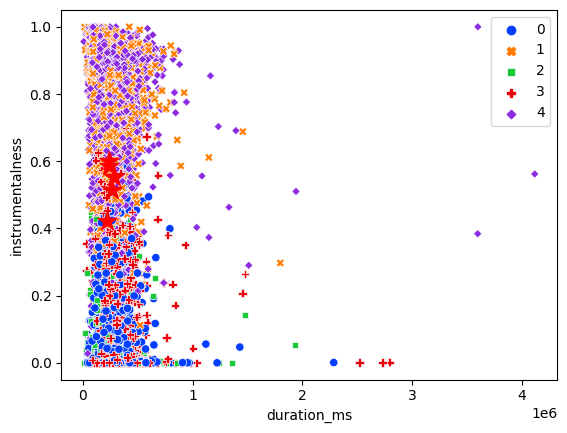

In [20]:
sns.scatterplot(data=df, 
                x="duration_ms", 
                y="instrumentalness", 
                hue=bkmeans.labels_, 
                style=bkmeans.labels_,
                palette="bright", 
               )
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

In [21]:
print('SSE', bkmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, bkmeans.labels_))

SSE 9296.29265167318
Silhouette 0.16147575466585562


In [22]:
cluster_labels = bkmeans.labels_

# Creare una nuova colonna nel DataFrame per i cluster
df['cluster'] = cluster_labels

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Determinare il cluster dominante per ogni genere
dominant_cluster_per_genre = cluster_genre_counts.idxmax(axis=0)

print(dominant_cluster_per_genre)

genre
0     2
1     1
2     2
3     2
4     2
5     2
6     3
7     2
8     2
9     0
10    2
11    2
12    3
13    2
14    2
15    2
16    3
17    2
18    0
19    1
dtype: int64
